## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
metadata_study_complete = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

metadata_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = metadata_study_complete["Mouse ID"].count()
print(number_mice)

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = metadata_study_complete[metadata_study_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice
                                                                     

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = metadata_study_complete.loc[metadata_study_complete["Mouse ID"]=="g989"]
all_duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate = metadata_study_complete.loc[metadata_study_complete["Mouse ID"]!="g989"]
clean_duplicate



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = clean_duplicate["Mouse ID"].nunique()
print(clean_number_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_duplicate.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_duplicate.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_duplicate.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
deviation = clean_duplicate.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = clean_duplicate.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"mean":mean,"median":median,"variance":variance,"deviation":deviation,"sem":sem})
summary_df                           

,mean,median,variance,deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_agg = clean_duplicate.groupby("Drug Regimen").agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
clean_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Tumor Volume (mm3)')

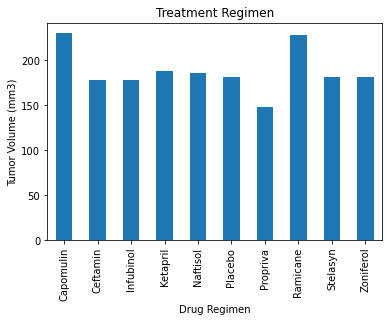

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
x_axis = clean_duplicate.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
x_axis.plot(kind = "bar")
plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

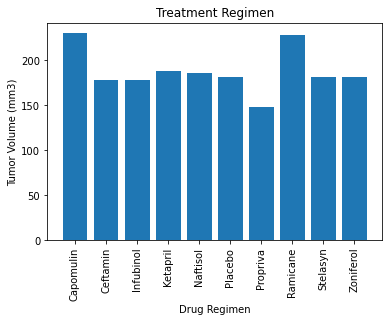

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x_axis.index.values,x_axis.values, align="center")
plt.xticks(rotation = 90)
plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Sex')

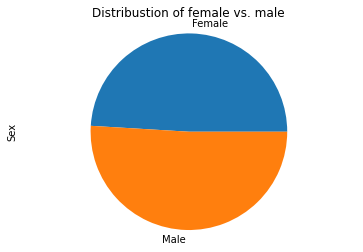

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
x_axis = clean_duplicate.groupby("Sex").count()["Mouse ID"]
x_axis
x_axis.plot(kind = "pie")
plt.title("Distribustion of female vs. male")
plt.axis("equal")
plt.ylabel("Sex")

(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

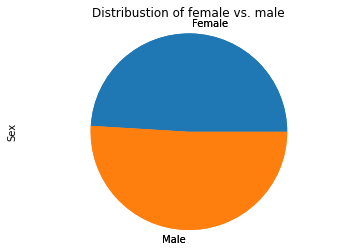

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x_axis.values,labels = x_axis.index.values)
x_axis.plot(kind = "pie")
plt.title("Distribustion of female vs. male")
plt.ylabel("Sex")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = metadata_study_complete[metadata_study_complete["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])] 


# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = treatment_regimens.sort_values(["Timepoint"], ascending= True)
treatment_regimens

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
best_treatment = treatment_regimens[["Drug Regimen","Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_treatment

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = best_treatment.loc[best_treatment['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_list.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f'{drug}’s potential outliers: {outliers}')
    

Capomulin’s potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane’s potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol’s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin’s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


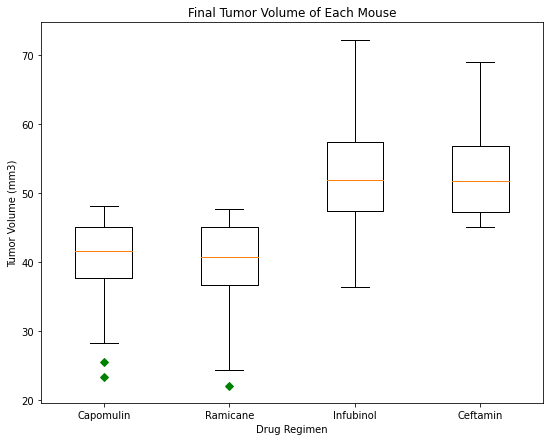

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.set_title('Final Tumor Volume of Each Mouse')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],treatments)
plt.show()

## Line and Scatter Plots

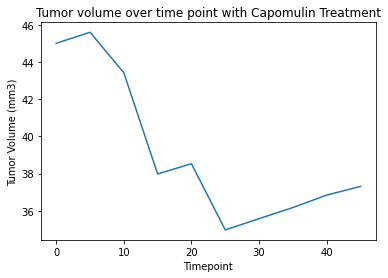

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
campomulin_tumor = metadata_study_complete.loc[(metadata_study_complete["Drug Regimen"] == "Capomulin") 
                                               & (metadata_study_complete["Mouse ID"] == "i738")]
time_point = campomulin_tumor["Timepoint"]
campomulin_tumor_vol = campomulin_tumor["Tumor Volume (mm3)"]
tumor_line, = plt.plot(time_point,campomulin_tumor_vol)
plt.title('Tumor volume over time point with Capomulin Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [17]:
campomulin_df = metadata_study_complete.loc[(metadata_study_complete["Drug Regimen"] == "Capomulin")]
campomulin_df = campomulin_df.reset_index()
campomulin_df.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


KeyError: 'Weight(g)'

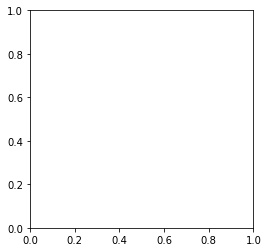

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = campomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]  
mouse_weight
ave_tumor_vol = pd.DataFrame(mouse_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
ave_tumor_vol.head()
ave_tumor_vol.plot(kind="scatter", x="Weight(g)", y="Average tumor volume", grid=True, figsize=(4,4), 
                   title="Average tumor volume vs. mouse weight capomulin treatment")
plt.show()                   
                                                         


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_data = metadata_study_complete['Tumor Volume (mm3)']
capomulin_weight = metadata_study_complete['Weight (g)']
capomulin_correlation = round(st.pearsonr(capomulin_data,capomulin_weight)[0],2)
capomulin_correlation

0.59